# Exercise 1. Stochastic of Inertial Sensors
## Task 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
from tqdm import tqdm
from utils import Io, Visuals, Math

In [2]:
# Get working dir
cwd = os.getcwd()

# Load and extract data from Matlab file
imarData = loadmat(cwd + "/data/IMAR.mat")
imarData = imarData['IMARdata']

sbgData = loadmat(cwd + "/data/SBG.mat")
sbgData = sbgData['SBGdata']

# Convert to Pandas Dataframe
imarData = Io.Mat2Pandas(imarData)
sbgData = Io.Mat2Pandas(sbgData)

### b.

In [3]:
# Statistics
imarData[imarData.columns[2:]].describe()  # Skipping timestamps cols

,accx,accy,accz,omgx,omgy,omgz,rate
count,995513.000000,995513.000000,995513.000000,995513.000000,995513.000000,995513.000000,995513.0
mean,-0.010455,0.004395,9.810134,-0.000036,-0.000029,0.000056,100.0
std,0.002989,0.007076,0.001822,0.000062,0.000036,0.000048,0.0
min,-0.024811,-0.027684,9.793748,-0.000356,-0.000187,-0.000176,100.0
25%,-0.012480,-0.000395,9.808903,-0.000076,-0.000053,0.000024,100.0
50%,-0.010483,0.004261,9.810109,-0.000035,-0.000029,0.000059,100.0
75%,-0.008453,0.008979,9.811336,0.000006,-0.000006,0.000088,100.0
max,0.005342,0.036954,9.827399,0.000199,0.000140,0.000287,100.0


In [4]:
sbgData[sbgData.columns[2:]].describe()  # Skipping timestamps cols

,accx,accy,accz,omgx,omgy,omgz,rate
count,735399.000000,735399.000000,735399.000000,735399.000000,735399.000000,735399.000000,735399.0
mean,0.026657,-0.005636,-9.819227,-0.003049,-0.000099,-0.000160,100.0
std,0.005414,0.005446,0.005033,0.000425,0.000430,0.000427,0.0
min,0.000065,-0.030781,-9.841400,-0.004898,-0.002061,-0.002086,100.0
25%,0.023000,-0.009302,-9.822644,-0.003336,-0.000389,-0.000448,100.0
50%,0.026651,-0.005635,-9.819224,-0.003049,-0.000099,-0.000159,100.0
75%,0.030308,-0.001969,-9.815809,-0.002763,0.000191,0.000128,100.0
max,0.052407,0.020904,-9.796194,-0.000907,0.001931,0.001876,100.0


In [5]:
# Difference between them
(imarData[imarData.columns[2:]].describe() - sbgData[sbgData.columns[2:]].describe()).abs().iloc[:3]

,accx,accy,accz,omgx,omgy,omgz,rate
count,260114.000000,260114.000000,260114.000000,260114.000000,260114.000000,260114.000000,260114.0
mean,0.037112,0.010031,19.629361,0.003014,0.000070,0.000217,0.0
std,0.002425,0.001630,0.003211,0.000363,0.000393,0.000379,0.0


#### IMAR

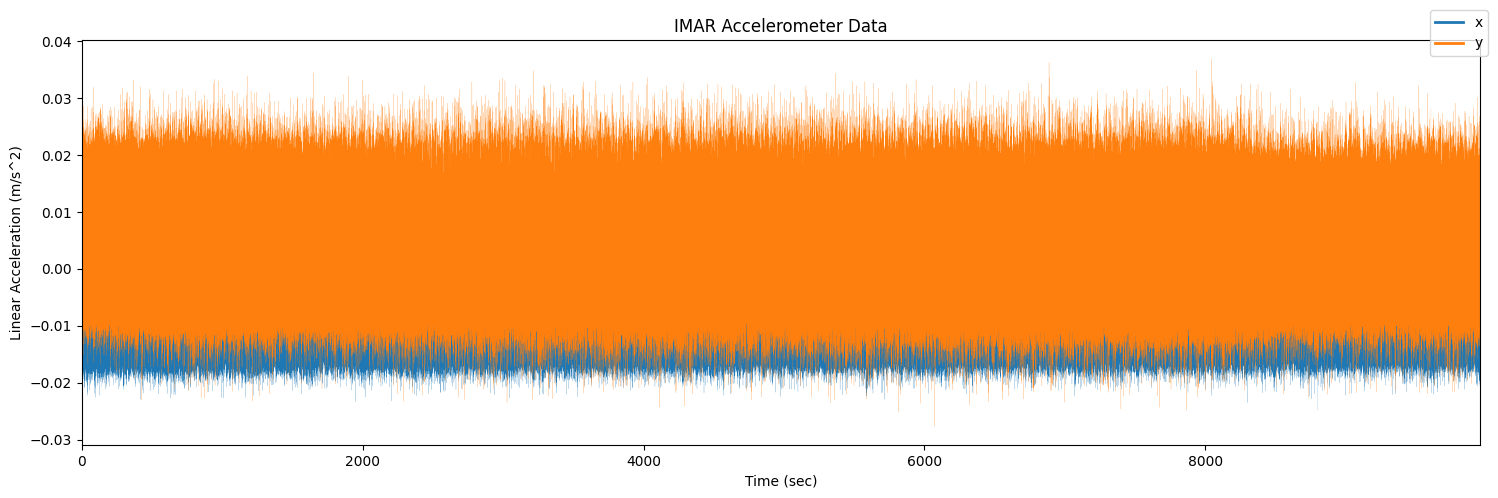

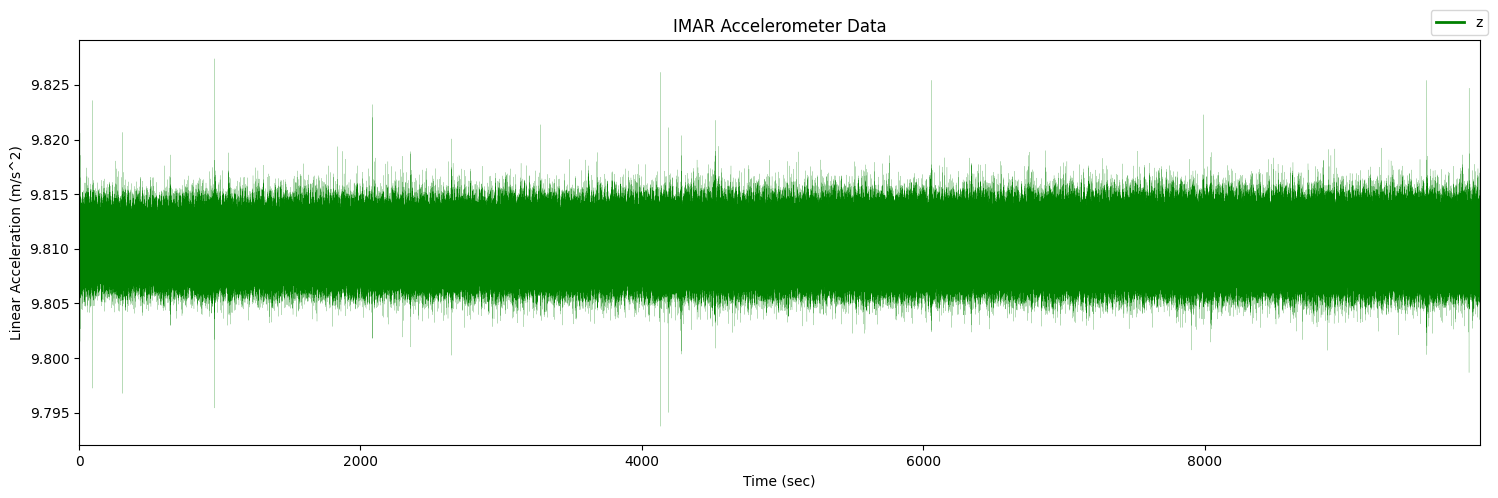

In [3]:
columns = ['accx', 'accy', 'accz']
labels = ['x', 'y', 'z']
Visuals.plotData(
    data=imarData,
    x='time_acc',
    columns=columns[:-1],
    xlabel='Time (sec)',
    ylabel='Linear Acceleration (m/s^2)',
    labels=labels[:-1],
    title="IMAR Accelerometer Data",
    linewidth=0.1
)
Visuals.plotData(
    data=imarData,
    x='time_acc',
    columns=[columns[-1]],
    xlabel='Time (sec)',
    ylabel='Linear Acceleration (m/s^2)',
    labels=[labels[-1]],
    title="IMAR Accelerometer Data",
    linewidth=0.1,
    color='green',
)

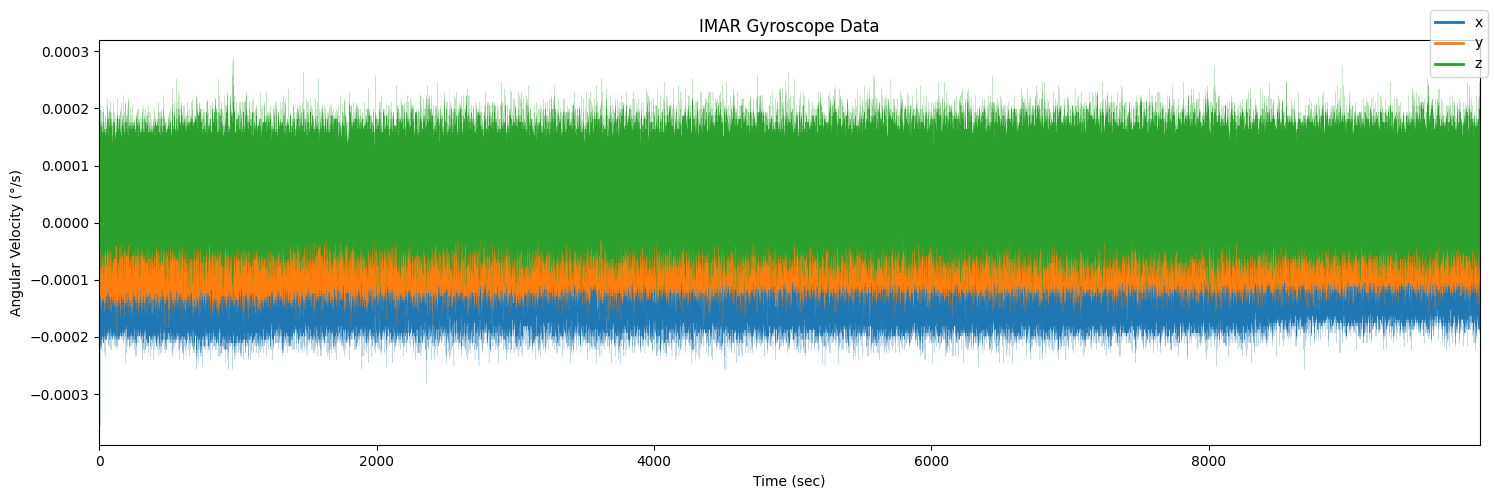

In [4]:
columns = ['omgx', 'omgy', 'omgz']
labels = ['x', 'y', 'z']
Visuals.plotData(
    data=imarData,
    x='time_omg',
    columns=columns,
    xlabel='Time (sec)',
    ylabel='Angular Velocity (°/s)',
    labels=labels,
    title="IMAR Gyroscope Data",
    linewidth=0.1
)

#### SBG

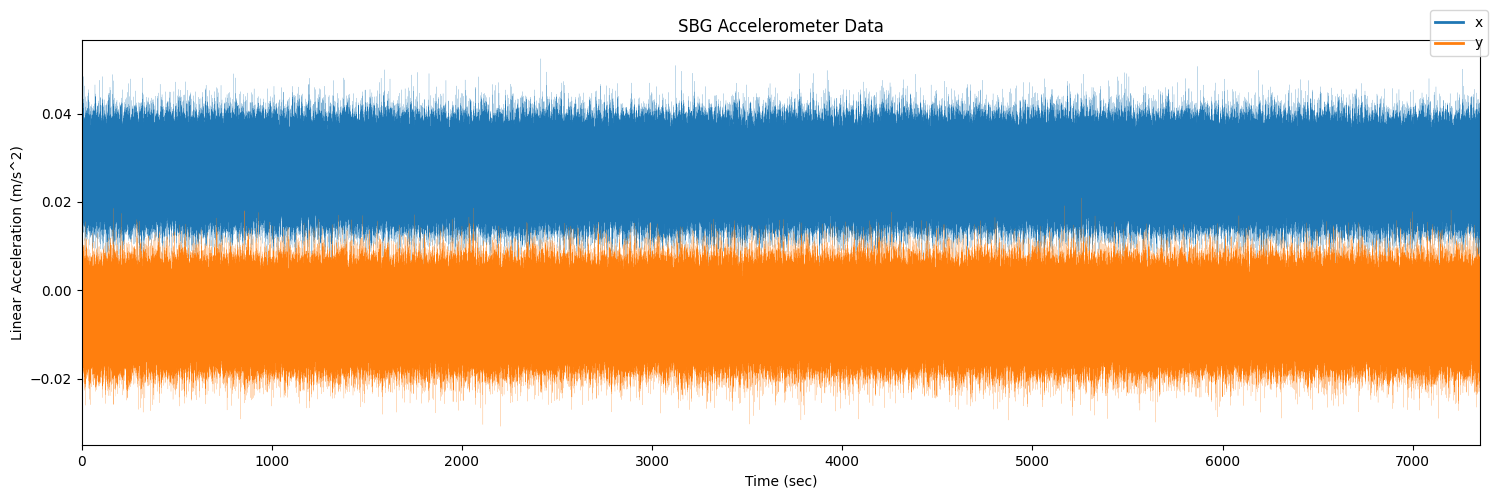

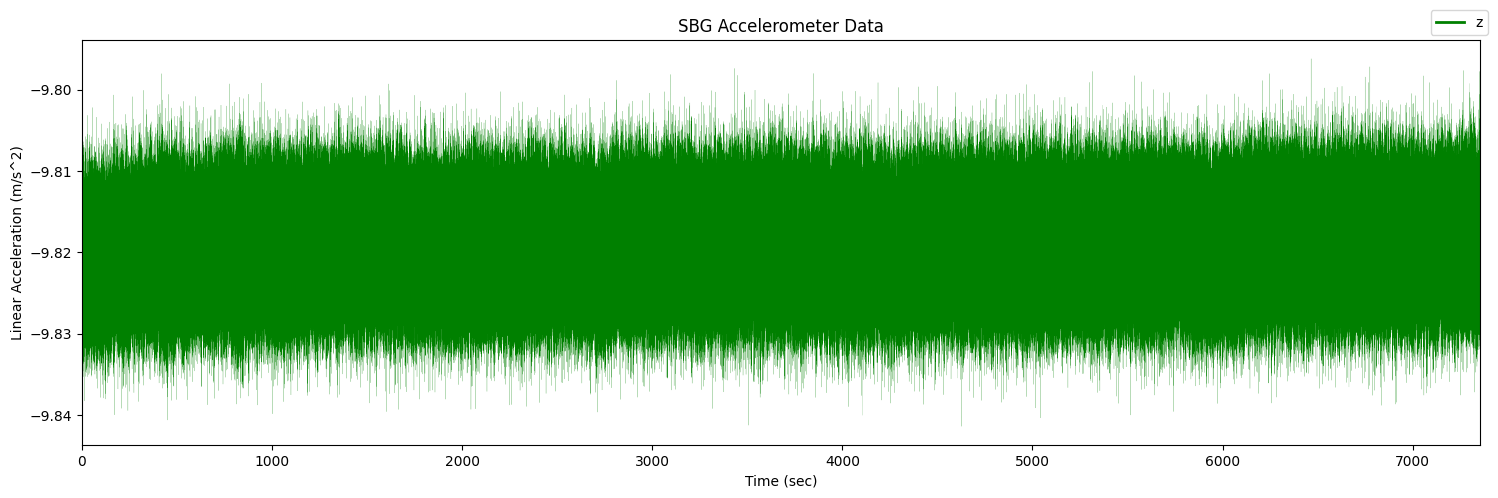

In [5]:
columns = ["accx", "accy", "accz"]
labels = ["x", "y", "z"]
Visuals.plotData(
    data=sbgData,
    x="time_acc",
    columns=columns[:-1],
    xlabel="Time (sec)",
    ylabel="Linear Acceleration (m/s^2)",
    labels=labels[:-1],
    title="SBG Accelerometer Data",
    linewidth=0.1,
)
Visuals.plotData(
    data=sbgData,
    x="time_acc",
    columns=[columns[-1]],
    xlabel="Time (sec)",
    ylabel="Linear Acceleration (m/s^2)",
    labels=[labels[-1]],
    title="SBG Accelerometer Data",
    linewidth=0.1,
    color="green",
)

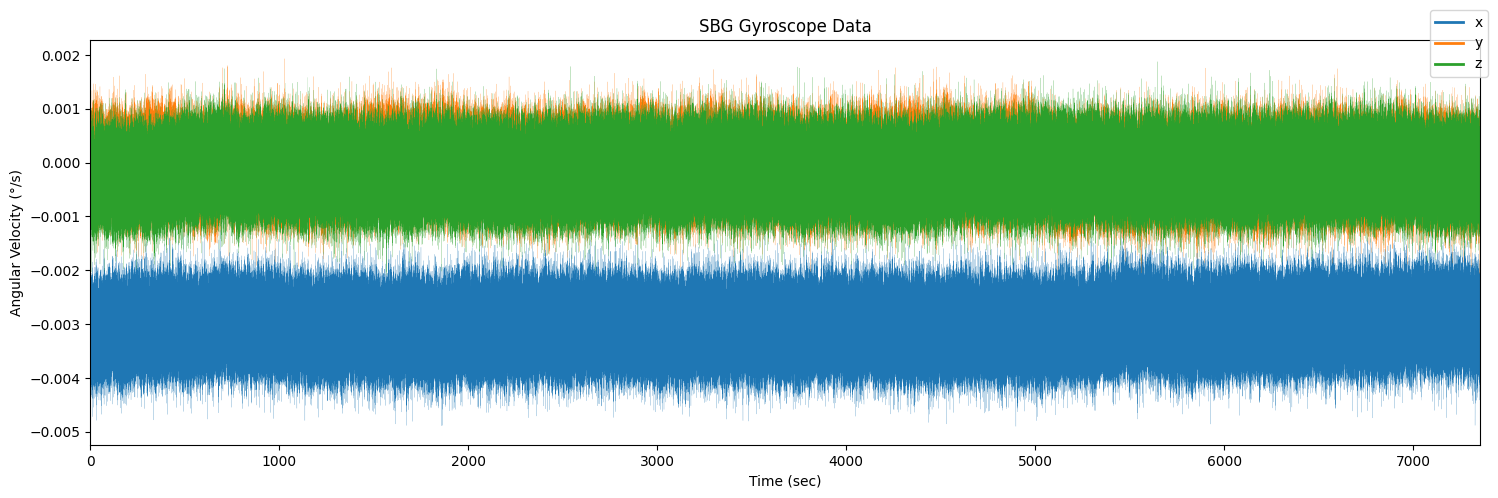

In [4]:
columns = ['omgx', 'omgy', 'omgz']
labels = ['x', 'y', 'z']
Visuals.plotData(
    data=sbgData,
    x='time_omg',
    columns=columns,
    xlabel='Time (sec)',
    ylabel='Angular Velocity (°/s)',
    labels=labels,
    title="SBG Gyroscope Data",
    linewidth=0.1
)

### d. Moving averages

In [34]:
window_sizes = [5, 10, 25, 50, 100]

for window in window_sizes:
    # Compute moving average
    imarRollingDf = imarData[['accx', 'accy', 'accz', 'omgx', 'omgy', 'omgz']].rolling(
        window=window,
    ).mean()

    sbgRollingDf = sbgData[['accx', 'accy', 'accz', 'omgx', 'omgy', 'omgz']].rolling(
        window=window,
    ).mean()

    print(64 * '-')
    print(f"Window = {window}")
    print(30*'-' + "IMAR" + 30*'-') 
    print(imarRollingDf.describe().iloc[1:3])
    print(30*'-' + "SBG" + 31*'-') 
    print(sbgRollingDf.describe().iloc[1:3])

    # Plot one line
    # plt.figure(figsize=(10,5))
    # sns.lineplot(
        # x=imarData['time_acc'],
        # y=tempDf['accx'],
        # linewidth=0.1
    # )

----------------------------------------------------------------
Window = 5
------------------------------IMAR------------------------------
          accx      accy      accz      omgx      omgy      omgz
mean -0.010455  0.004395  9.810134 -0.000036 -0.000029  0.000056
std   0.001146  0.003387  0.000706  0.000023  0.000010  0.000025
------------------------------SBG-------------------------------
          accx      accy      accz      omgx      omgy      omgz
mean  0.026657 -0.005636 -9.819227 -0.003049 -0.000099 -0.000160
std   0.002595  0.002671  0.002220  0.000193  0.000193  0.000193
----------------------------------------------------------------
Window = 10
------------------------------IMAR------------------------------
          accx      accy      accz      omgx      omgy      omgz
mean -0.010455  0.004395  9.810134 -0.000036 -0.000029  0.000056
std   0.000791  0.003079  0.000410  0.000021  0.000006  0.000023
------------------------------SBG-------------------------------
  

The mean ($\mu$) reamins the same, while the standard deviation ($\sigma$) decreases.

## Task 2

**Update orientation**

- Measured angular velocity [rad/s]: $\omega = [\omega_x, \omega_y, \omega_z]$
- Skew symmetric matrix of the angular velocity: $S_\omega = \begin{bmatrix}0 & -\omega_z & \omega_y \\ \omega_z & 0 & -\omega_x \\ -\omega_x & \omega_y & 0\end{bmatrix}$
- Update rotation matrix: $R_{i+1} = R_i (I_3 + S_\omega \delta t)$
- Euler angles from rotations matrix in [rad]:
$$r_x = atan2(R(3,2), R(3,3))$$
$$r_y = atan2(-R(3,1), \sqrt{R(3,2)^2 + R(3,3)^2})$$
$$r_z = atan2(R(2,1), R(1,1))$$

In [3]:
omega = np.array([4.087223e-08, 0.000064, 0.000117])
delta = 0.01
rotMat = Math.updateOrientation(omega, delta)
eulerAngle = Math.rotationMatrix2Euler(rotMat)

print(f"Rotation matrix:\n{rotMat}")
print(f"Euler angles:\n{eulerAngle}")

Rotation matrix:
[[ 1.000000e+00 -1.170000e-06  6.400000e-07]
 [ 1.170000e-06  1.000000e+00 -4.087223e-10]
 [-4.087223e-10  6.400000e-07  1.000000e+00]]
Euler angles:
[6.400000e-07 4.087223e-10 1.170000e-06]


**Update velocity and position**
- Measured specific force in $m/s^2$: $f^b_{ib} = [f^b_{ib,x}, f^b_{ib,y}, f^b_{ib,z}]$
- Acceleration: $a^b_{ib} = f^b{ib} + g_0$
- $g_0$: Vector of gravitation estimated from static measurements
- Velocity update: $v_{i+1} = v_i + a^b_{ib} \Delta t$
- Position update: $p_{i+1} = p_i + v_i \Delta t - a_i \frac{\Delta t^2}{2}$

In [4]:
GRAVITY = imarData["accz"].mean()
f = np.array([-0.007902, 0.011560, 9.812433])
a = f + np.array([0, 0, -GRAVITY])
delta = 0.01
v = Math.updateVelocity(a, delta)
p = Math.updatePosition(v, a, delta)

print(f"Acceleration: \n{a}")
print(f"Velocity: \n{v}")
print(f"Position: \n{p}")

Acceleration: 
[-0.007902    0.01156     0.00229922]
Velocity: 
[-7.90200000e-05  1.15600000e-04  2.29921755e-05]
Position: 
[-1.18530000e-06  1.73400000e-06  3.44882633e-07]


In [5]:
# Gravity vectors
GRAVITY_IMAR = np.array([0, 0, imarData["accz"].mean()])
GRAVITY_SBG = np.array([0, 0, sbgData["accz"].mean()])

In [7]:
# New data cols
euler_angle_cols = ['psi', 'theta', 'phi']
velocity_cols = ['velx', 'vely', 'velz']
position_cols = ['posx', 'posy', 'posz']

new_columns = [*euler_angle_cols, *velocity_cols, *position_cols]

### IMAR

In [20]:
accel_cols = ['accx', 'accy', 'accz']
omg_cols = ['omgx', 'omgy', 'omgz']
time_col = 'time_acc'  # It is the same as 'time_omg'

pose_prediction = Math.computePoseIntegrationMethod(
    imarData,
    accel_cols,
    omg_cols,
    time_col,
    GRAVITY_IMAR 
)

100%|██████████| 995513/995513 [00:22<00:00, 44746.10it/s]


In [8]:
# np.save("imar_simple_integration", pose_prediction)
pose_prediction = np.load("imar_simple_integration.npy")

In [9]:
imarData[new_columns] = pose_prediction
imarData

,time_acc,time_omg,accx,accy,accz,omgx,omgy,omgz,rate,psi,theta,phi,velx,vely,velz,posx,posy,posz
0,0.00,0.00,-0.007902,0.011560,9.812433,-1.752268e-05,0.000006,0.000041,100,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.01,0.01,-0.008209,-0.007507,9.810412,4.087223e-08,0.000064,0.000117,100,5.799276e-08,-1.752268e-07,4.102903e-07,-0.000079,0.000116,0.000023,-3.951106e-07,5.779996e-07,1.149405e-07
2,0.02,0.02,-0.012855,0.009260,9.807368,-8.182971e-05,-0.000012,0.000023,100,7.010473e-07,-1.748181e-07,1.580902e-06,-0.000161,0.000041,0.000026,-1.595785e-06,1.358656e-06,3.587204e-07
3,0.03,0.03,-0.014153,-0.002062,9.807344,2.335480e-05,-0.000024,0.000059,100,5.841293e-07,-9.931153e-07,1.815785e-06,-0.000290,0.000133,-0.000002,-3.849685e-06,2.226966e-06,4.781029e-07
4,0.04,0.04,-0.010793,0.013238,9.808973,-5.270285e-05,-0.000123,-0.000017,100,3.483036e-07,-7.595676e-07,2.402017e-06,-0.000431,0.000113,-0.000030,-7.453994e-06,3.455154e-06,3.196953e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995508,9955.08,9955.08,-0.005004,0.003394,9.812840,-1.756347e-05,-0.000006,0.000094,100,-3.849212e-01,-2.485357e-01,6.243016e-01,-104.075480,43.750556,0.000019,-5.156831e+05,2.173233e+05,-7.783357e+02
995509,9955.09,9955.09,-0.014744,0.012382,9.809209,-9.937563e-05,-0.000006,0.000070,100,-3.849215e-01,-2.485355e-01,6.243025e-01,-104.075530,43.750590,0.000046,-5.156842e+05,2.173237e+05,-7.783357e+02
995510,9955.10,9955.10,-0.013220,0.004043,9.806136,5.800015e-06,-0.000029,0.000070,100,-3.849219e-01,-2.485362e-01,6.243036e-01,-104.075678,43.750714,0.000037,-5.156852e+05,2.173242e+05,-7.783357e+02
995511,9955.11,9955.11,-0.010476,0.005945,9.810139,-3.513523e-05,-0.000065,0.000041,100,-3.849223e-01,-2.485358e-01,6.243043e-01,-104.075810,43.750754,-0.000003,-5.156863e+05,2.173246e+05,-7.783357e+02


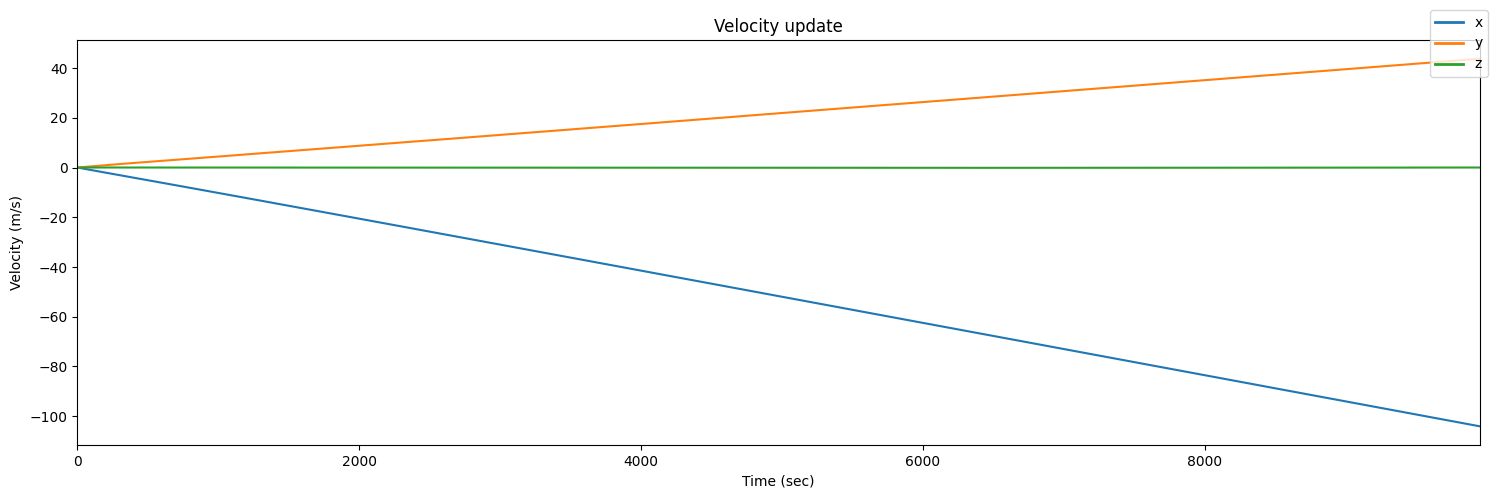

In [22]:
Visuals.plotData(data=imarData, x='time_acc', columns=['velx', 'vely', 'velz'], xlabel='Time (sec)', ylabel='Velocity (m/s)', labels=['x', 'y', 'z'], title='Velocity update')

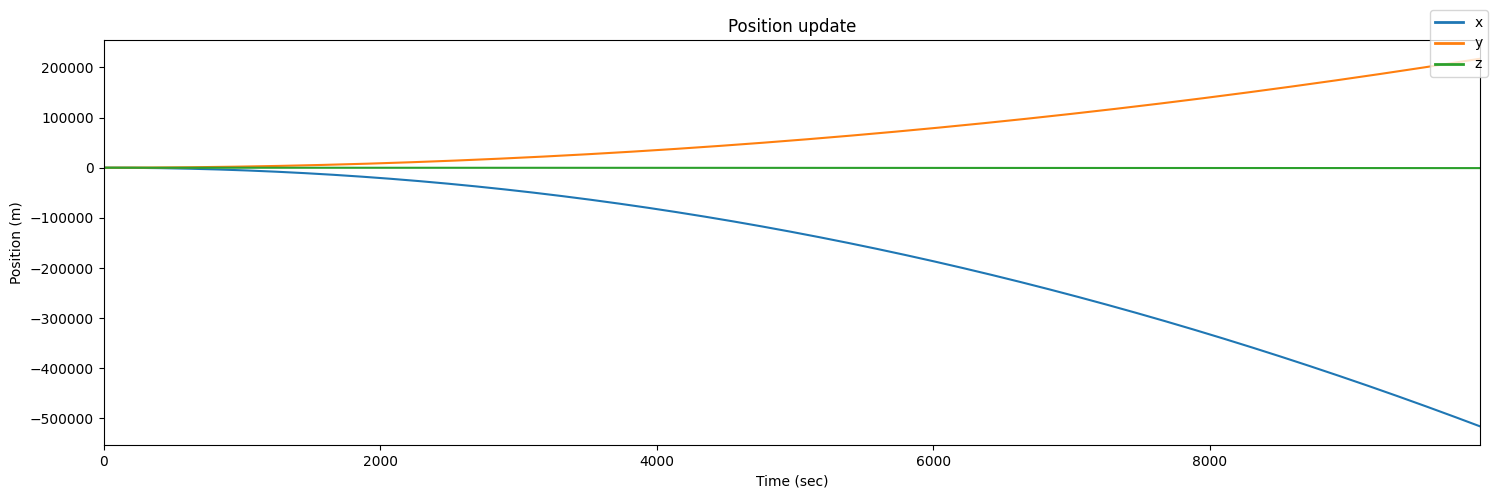

In [23]:
Visuals.plotData(data=imarData, x='time_acc', columns=['posx', 'posy', 'posz'], xlabel='Time (sec)', ylabel='Position (m)', labels=['x', 'y', 'z'], title='Position update')

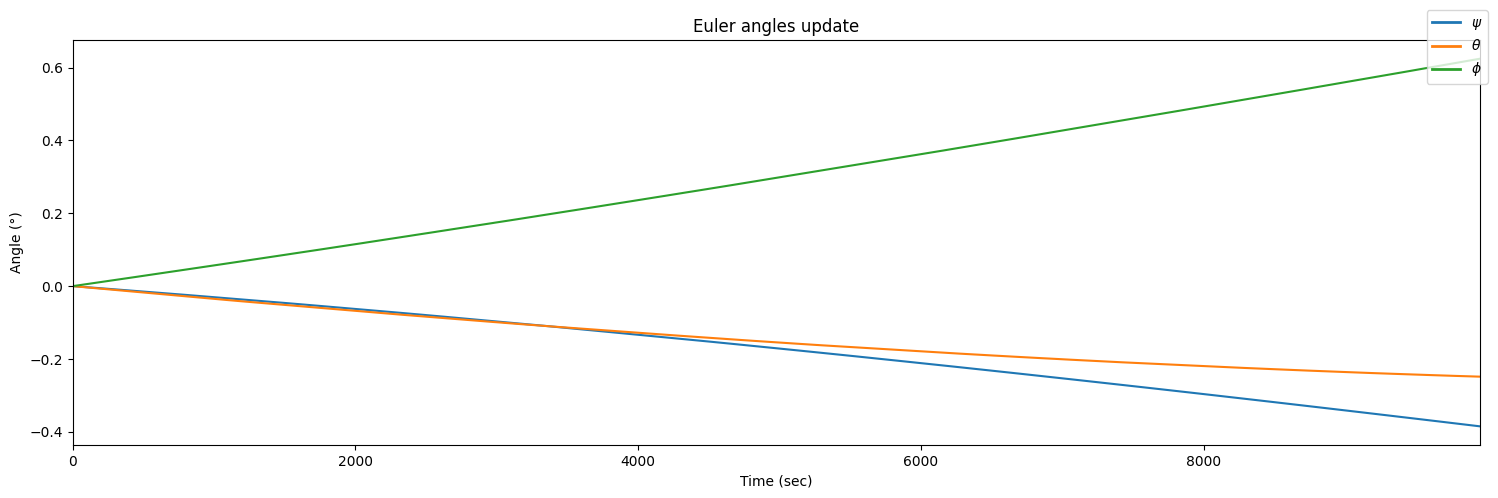

In [24]:
Visuals.plotData(data=imarData, x='time_acc', columns=['psi', 'theta', 'phi'], xlabel='Time (sec)', ylabel='Angle (°)', labels=['$\\psi$', '$\\theta$', '$\\phi$'], title='Euler angles update')

### SBG

In [25]:
pose_prediction = Math.computePoseIntegrationMethod(
    sbgData,
    accel_cols,
    omg_cols,
    time_col,
    GRAVITY_SBG
)

100%|██████████| 735399/735399 [00:16<00:00, 45458.14it/s]


In [10]:
# np.save("sbg_simple_integration", pose_prediction)
pose_prediction = np.load("sbg_simple_integration.npy")

In [11]:
sbgData[new_columns] = pose_prediction
sbgData

,time_acc,time_omg,accx,accy,accz,omgx,omgy,omgz,rate,psi,theta,phi,velx,vely,velz,posx,posy,posz
0,0.00,0.00,0.030871,-0.006173,-9.816584,-0.002265,-2.472685e-04,0.000109,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,0.01,0.01,0.031588,0.004174,-9.828276,-0.003887,-2.294241e-04,-0.000794,100,-0.000002,-0.000023,0.000001,0.000309,-0.000062,0.000026,0.000002,-3.086611e-07,1.321550e-07
2,0.02,0.02,0.033491,-0.005692,-9.821117,-0.002777,-4.907124e-07,-0.000454,100,-0.000005,-0.000062,-0.000007,0.000625,-0.000020,-0.000064,0.000006,-7.172846e-07,-5.598249e-08
3,0.03,0.03,0.030782,-0.002433,-9.818702,-0.003760,-7.685852e-04,-0.000164,100,-0.000005,-0.000089,-0.000011,0.000959,-0.000077,-0.000083,0.000014,-1.201803e-06,-7.911008e-07
4,0.04,0.04,0.023012,-0.002295,-9.821590,-0.002627,-4.647539e-04,-0.000484,100,-0.000012,-0.000127,-0.000013,0.001267,-0.000101,-0.000078,0.000025,-2.092545e-06,-1.594503e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735394,7353.94,7353.94,0.032608,-0.014871,-9.820513,-0.002969,-2.163593e-05,-0.000144,100,0.456884,-1.273738,1.406268,196.036759,-41.445009,-0.000006,722412.320418,-1.523728e+05,-5.478999e+03
735395,7353.95,7353.95,0.023163,-0.000921,-9.815941,-0.002559,-2.056626e-04,-0.000384,100,0.456882,-1.273737,1.406268,196.037085,-41.445158,-0.000019,722414.280787,-1.523733e+05,-5.478999e+03
735396,7353.96,7353.96,0.031050,0.003212,-9.824295,-0.002658,-6.801591e-04,-0.000585,100,0.456890,-1.273736,1.406268,196.037317,-41.445167,0.000014,722416.241159,-1.523737e+05,-5.478999e+03
735397,7353.97,7353.97,0.021856,-0.006854,-9.810421,-0.003436,1.942834e-04,-0.000252,100,0.456906,-1.273739,1.406268,196.037627,-41.445135,-0.000037,722418.201534,-1.523741e+05,-5.478999e+03


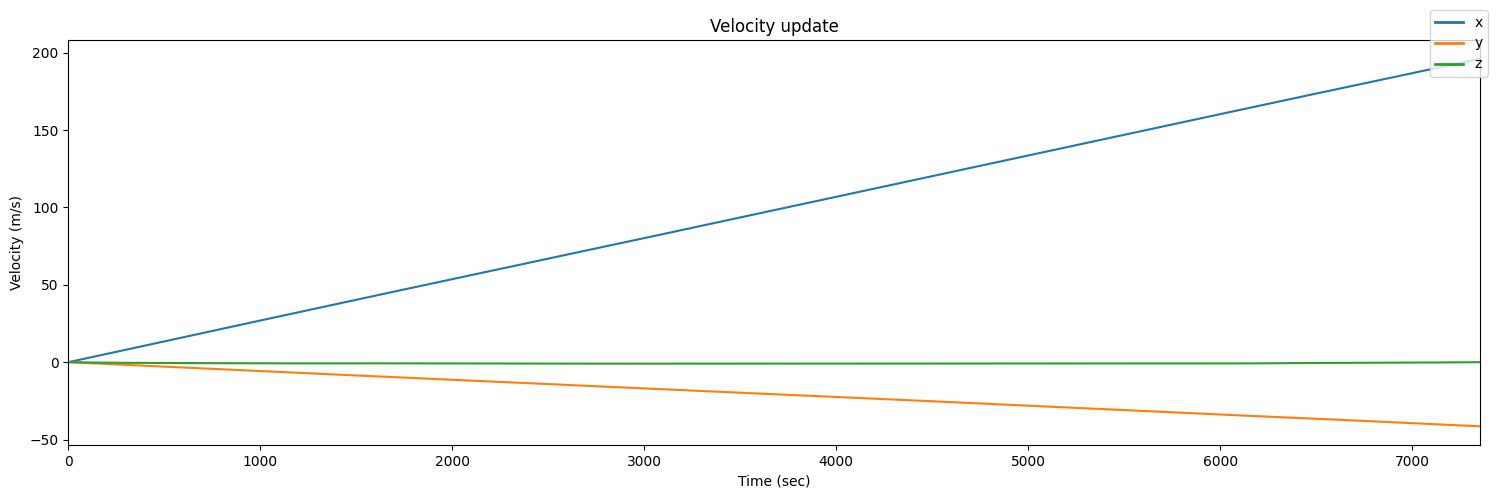

In [28]:
Visuals.plotData(data=sbgData, x='time_acc', columns=['velx', 'vely', 'velz'], xlabel='Time (sec)', ylabel='Velocity (m/s)', labels=['x', 'y', 'z'], title='Velocity update')

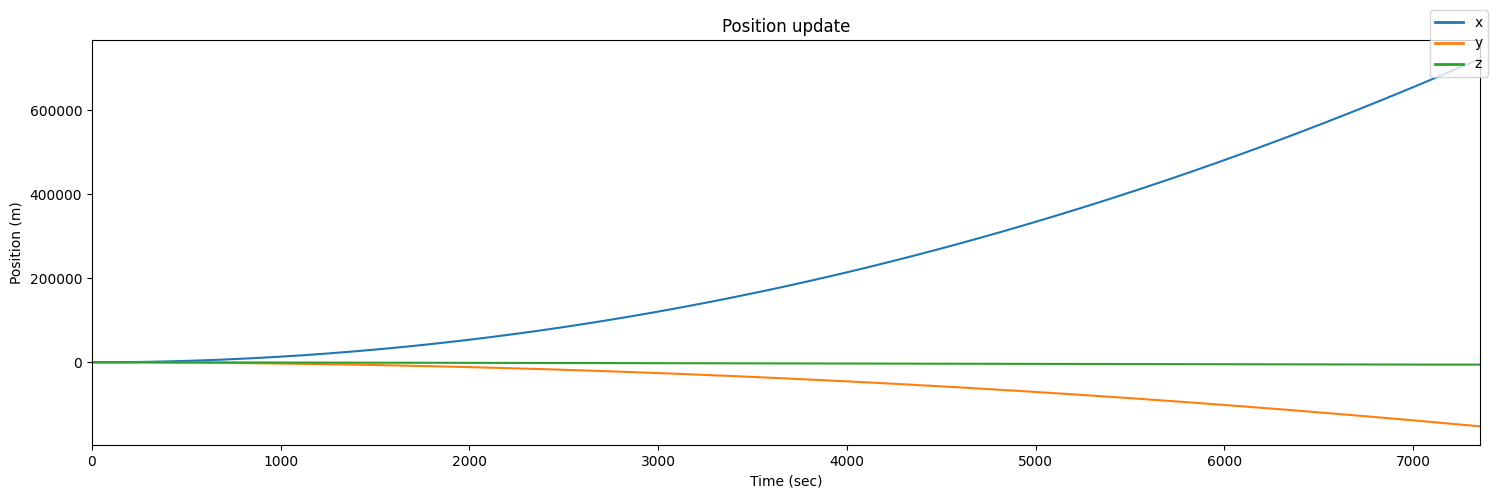

In [29]:
Visuals.plotData(data=sbgData, x='time_acc', columns=['posx', 'posy', 'posz'], xlabel='Time (sec)', ylabel='Position (m)', labels=['x', 'y', 'z'], title='Position update')

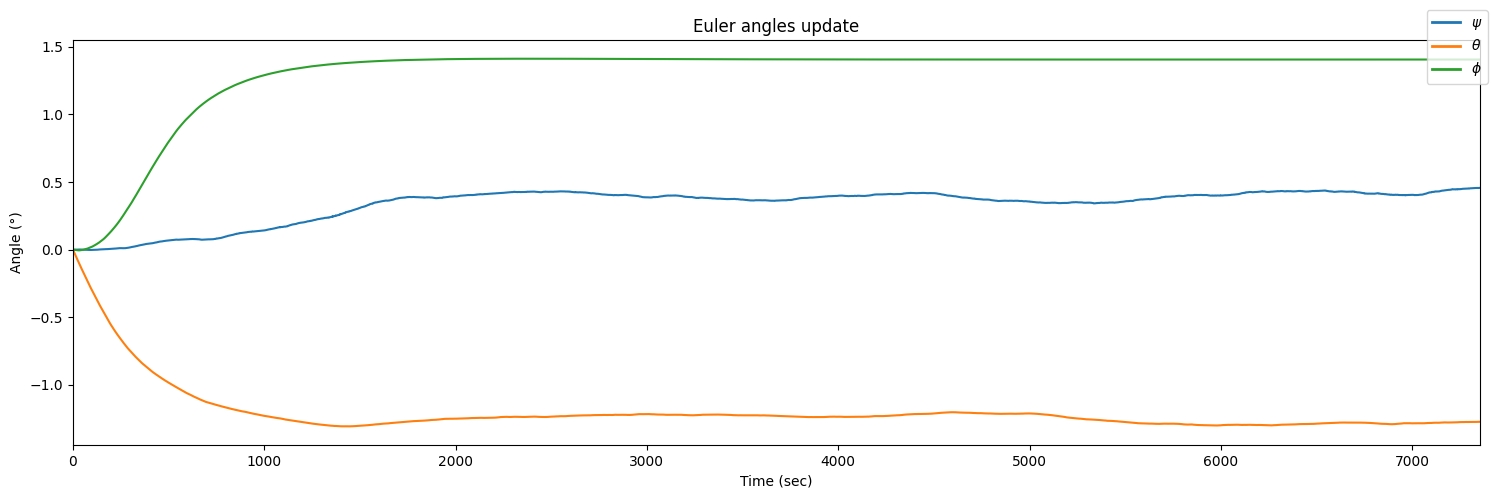

In [30]:
Visuals.plotData(data=sbgData, x='time_acc', columns=['psi', 'theta', 'phi'], xlabel='Time (sec)', ylabel='Angle (°)', labels=['$\\psi$', '$\\theta$', '$\\phi$'], title='Euler angles update')

## Task 3

**Attitude Update**
$$\mathbf{R}_b^i (t+1) = \mathbf{R}_b^i (t) \left( \mathbf{I}_3 + \mathbf{\Omega}_{ib}^b \tau_i \right)$$
$$\mathbf{I}_3 + \mathbf{\Omega}_{ib}^b \tau_i = \begin{bmatrix} 1 & -\omega_{ib, z}^b \tau_i & \omega_{ib, y}^b \tau_i \\ \omega_{ib,z }^b \tau_i & 1 & -\omega_{ib, x}^b \tau_i \\ -\omega_{ib, y}^b \tau_i & \omega_{ib, x}^b \tau_i & 1 \end{bmatrix}$$

**Specific-Force Frame Transformation**
$$\mathbf{f}_{ib}^i = \mathbf{R}_b^i (t) \mathbf{f}_{ib}^b (t)$$
$$\mathbf{f}_{ib}^i = \frac{1}{2} \left( \mathbf{R}_b^i (t) + \mathbf{R}_b^i (t+1) \right) \mathbf{f}_{ib}^b$$

**Gravitational Constant**
$$\gamma_{ib}^i = - \frac{\mu}{|r_{ib}^i|^3} \left( r_{ib}^i + \frac{3}{2} J_2 \frac{R_0^2}{|r_{ib}^i|^2} \begin{bmatrix} [1 - 5(r_{ib, z}^i / |r_{ib}^i|)^2] r_{ib, x}^i \\ [1 - 5(r_{ib, z}^i / |r_{ib}^i|)^2] r_{ib, y}^i \\ [3 - 5(r_{ib, z}^i / |r_{ib}^i|)^2] r_{ib, z}^i \end{bmatrix} \right)$$

**Velocity Update**
$$\mathbf{a}_{ib}^i = \mathbf{f}_{ib}^i + \mathbf{\gamma}_{ib}^i (\mathbf{r}_{ib}^i)$$
$$\mathbf{v}_{ib}^i (t+1) = \mathbf{v}_{ib}^i (t) + \mathbf{a}_{ib}^i \tau_i$$

**Position Update**
$$\mathbf{r}_{ib}^i (t+1) = \mathbf{r}_{ib}^i (t) + \mathbf{v}_{ib}^i (t) \tau_i + \mathbf{a}_{ib}^i \frac{\tau_i^2}{2}$$

In [17]:
def updateAttitude(
    previous_rotation_matrix: np.ndarray,
    current_angular_velocity: np.ndarray,
    delta: float
) -> np.ndarray:
    coordinate_transformation_matrix_derivative_approx = np.array([
        [1, -current_angular_velocity[2] * delta, current_angular_velocity[1] * delta],
        [current_angular_velocity[2] * delta, 1, -current_angular_velocity[0] * delta],
        [-current_angular_velocity[1] * delta, current_angular_velocity[0] * delta, 1]
    ]) 
    current_rotation_matrix = previous_rotation_matrix @ coordinate_transformation_matrix_derivative_approx

    return current_rotation_matrix

def specificForceFrameTransformation(
    current_rotation_matrix: np.ndarray,
    previous_rotation_matrix: np.ndarray,
    measured_specific_force: np.ndarray
) -> np.ndarray:
    measured_specific_force_transformed = 1/2 * (previous_rotation_matrix + current_rotation_matrix) @ measured_specific_force
    
    return measured_specific_force_transformed


def computeGravitationECI(current_position: np.ndarray) -> np.ndarray:
    R_0 = 6378137  # WGS84 Equatorial radius in meters
    mu = 3.986004418e14  # WGS84 Earth gravitational constant (m^3 s^-2)
    J_2 = 1.082627e-3  # WGS84 Earth's second gravitational constant

    mag_r = np.linalg.norm(current_position)
    # print(f"{mag_r=}")

    if mag_r == 0:
        return np.array([0,0,0])
    
    z_scale = 5 * (current_position[2] / mag_r)**2
    # print(f"{z_scale=}")
    rhs_array = np.array([
        [(1 - z_scale) * current_position[0]],
        [(1 - z_scale) * current_position[1]],
        [(3 - z_scale) * current_position[2]]
    ])
    # print(f"{rhs_array=}")
    gamma = -mu / (mag_r**3) * (
        (current_position[..., np.newaxis] + 1.5 * J_2 * (R_0 / mag_r)**2) * rhs_array)

    return gamma.T[0]


def obtainAcceleration(measured_specific_force: np.ndarray, current_position: np.ndarray) -> np.ndarray:
    gamma = computeGravitationECI(current_position)
    current_acceleration = measured_specific_force + gamma
    
    return current_acceleration


def updateVelocity(previous_velocity: np.ndarray, current_acceleration: np.ndarray, delta: float) -> np.ndarray:
    return previous_velocity + current_acceleration * delta


def updatePosition(previous_position: np.ndarray, current_velocity: np.ndarray, current_acceleration: np.ndarray, delta: float) -> np.ndarray:
    return previous_position + current_velocity * delta - current_acceleration * (delta**2 / 2)

In [18]:
computeGravitationECI(np.array([1,1,1]))

array([ 1.12616281e+24,  1.12616281e+24, -2.25232561e+24])

### IMAR

In [19]:
results = np.zeros(shape=(len(imarData), 9))  # angles, vel, pos
# Initialization
previous_time = 0.0
previous_angular_vel = np.zeros(3)
previous_rotation_matrix = np.eye(3)
previous_acceleration = np.zeros(3)
previous_velocity = np.zeros(3)
previous_position = np.zeros(3)

current_time = 0.0
current_angular_vel = np.zeros(3)
current_rotation_matrix = np.eye(3)
current_acceleration = np.zeros(3)
current_velocity = np.zeros(3)
current_position = np.zeros(3)


for index, row in enumerate(tqdm(imarData.to_numpy()[:, 1:8])):
    # First iter
    if index < 1:
        previous_time = row[0]
        continue

    measured_specific_force = row[1:4]
    # print(f"{measured_specific_force=}")
    current_angular_vel = row[4:]
    # print(f"{current_angular_vel=}")

    # Delta
    current_time = row[0]
    delta_time = current_time - previous_time

    # Update attitude
    current_rotation_matrix = updateAttitude(
        previous_rotation_matrix,
        current_angular_vel,
        delta_time
    )
    # print(f"{current_rotation_matrix=}")

    # Specific force frame transformation
    measured_specific_force_transformed = specificForceFrameTransformation(
        current_rotation_matrix,
        previous_rotation_matrix,
        measured_specific_force 
    )
    # print(f"{measured_specific_force_transformed=}")

    # Obtain actual acceleration
    current_acceleration = obtainAcceleration(
        measured_specific_force_transformed,
        current_position,
    )
    # print(f"{current_acceleration=}")

    # Update velocity
    current_velocity = updateVelocity(
        previous_velocity,
        current_acceleration,
        delta_time
    )
    # print(f"{current_velocity=}")

    # Update position
    current_position = updatePosition(
        previous_position,
        current_velocity,
        current_acceleration,
        delta_time
    )
    # print(f"{current_position=}")

    # Saves
    results[index, :3] = Math.rotationMatrix2Euler(current_rotation_matrix)
    results[index, 3:6] = current_velocity
    results[index, 6:] = current_position

    # Updates variables
    previous_time = current_time
    previous_acceleration = current_acceleration
    previous_angular_vel = current_angular_vel
    previous_rotation_matrix = current_rotation_matrix
    previous_velocity = current_velocity
    previous_position = current_position

100%|██████████| 995513/995513 [00:22<00:00, 43899.51it/s]


In [20]:
columns = ['psi', 'theta', 'phi', 'velx', 'vely', 'velz', 'posx', 'posy','posz']
imarData[columns] = results
imarData

,time_acc,time_omg,accx,accy,accz,omgx,omgy,omgz,rate,psi,theta,phi,velx,vely,velz,posx,posy,posz
0,0.00,0.00,-0.007902,0.011560,9.812433,-1.752268e-05,0.000006,0.000041,100,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.01,0.01,-0.008209,-0.007507,9.810412,4.087223e-08,0.000064,0.000117,100,4.087223e-10,6.430547e-07,0.000001,-8.205906e-05,-7.506869e-05,9.810412e-02,-4.102953e-07,-3.753435e-07,4.905206e-04
2,0.02,0.02,-0.012855,0.009260,9.807368,-8.182971e-05,-0.000012,0.000023,100,-8.178882e-07,5.261368e-07,0.000001,-1.521822e+34,-1.392182e+34,9.096908e+36,-7.609109e+31,-6.960912e+31,4.548454e+34
3,0.03,0.03,-0.014153,-0.002062,9.807344,2.335480e-05,-0.000024,0.000059,100,-5.843398e-07,2.903122e-07,0.000002,-1.521822e+34,-1.392182e+34,9.096908e+36,-2.282733e+32,-2.088274e+32,1.364536e+35
4,0.04,0.04,-0.010793,0.013238,9.808973,-5.270285e-05,-0.000123,-0.000017,100,-1.111368e-06,-9.402775e-07,0.000002,-1.521822e+34,-1.392182e+34,9.096908e+36,-3.804554e+32,-3.480456e+32,2.274227e+35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995508,9955.08,9955.08,-0.005004,0.003394,9.812840,-1.756347e-05,-0.000006,0.000094,100,-4.214562e-01,-1.733730e-01,0.608764,-1.521822e+34,-1.392182e+34,9.096908e+36,-1.514983e+38,-1.385927e+38,9.056031e+40
995509,9955.09,9955.09,-0.014744,0.012382,9.809209,-9.937563e-05,-0.000006,0.000070,100,-4.214573e-01,-1.733728e-01,0.608765,-1.521822e+34,-1.392182e+34,9.096908e+36,-1.514985e+38,-1.385928e+38,9.056040e+40
995510,9955.10,9955.10,-0.013220,0.004043,9.806136,5.800015e-06,-0.000029,0.000070,100,-4.214574e-01,-1.733728e-01,0.608765,-1.521822e+34,-1.392182e+34,9.096908e+36,-1.514987e+38,-1.385929e+38,9.056050e+40
995511,9955.11,9955.11,-0.010476,0.005945,9.810139,-3.513523e-05,-0.000065,0.000041,100,-4.214579e-01,-1.733732e-01,0.608766,-1.521822e+34,-1.392182e+34,9.096908e+36,-1.514988e+38,-1.385931e+38,9.056059e+40


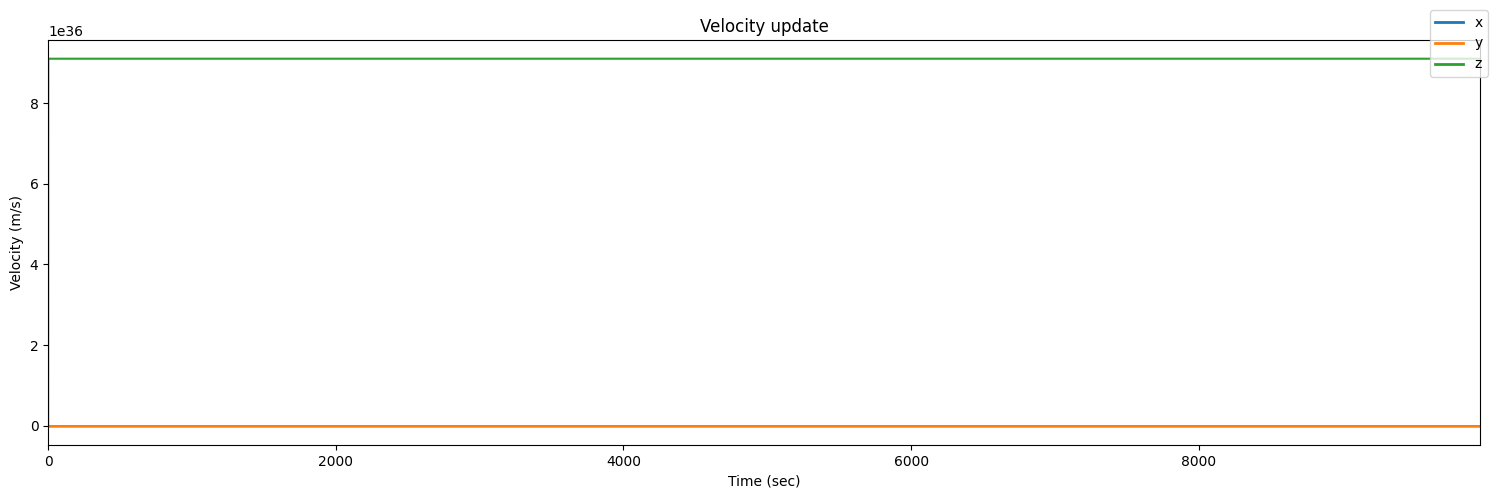

In [21]:
Visuals.plotData(
    data=imarData,
    x="time_acc",
    columns=["velx", "vely", "velz"],
    xlabel="Time (sec)",
    ylabel="Velocity (m/s)",
    labels=["x", "y", "z"],
    title="Velocity update",
)

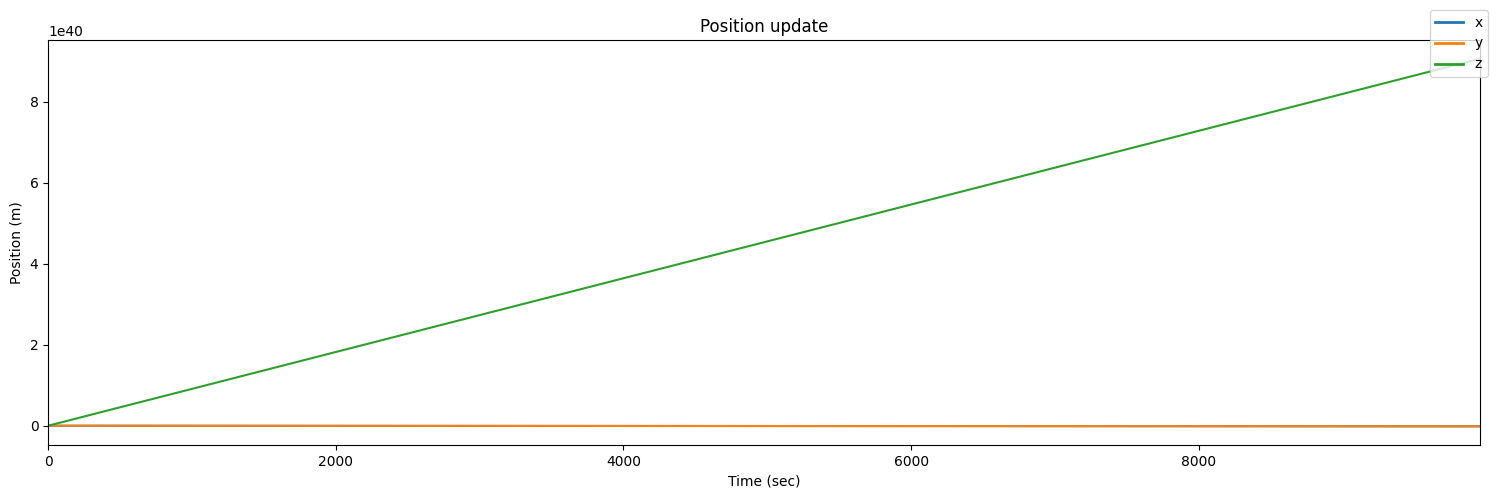

In [22]:
Visuals.plotData(
    data=imarData,
    x="time_acc",
    columns=["posx", "posy", "posz"],
    xlabel="Time (sec)",
    ylabel="Position (m)",
    labels=["x", "y", "z"],
    title="Position update",
)

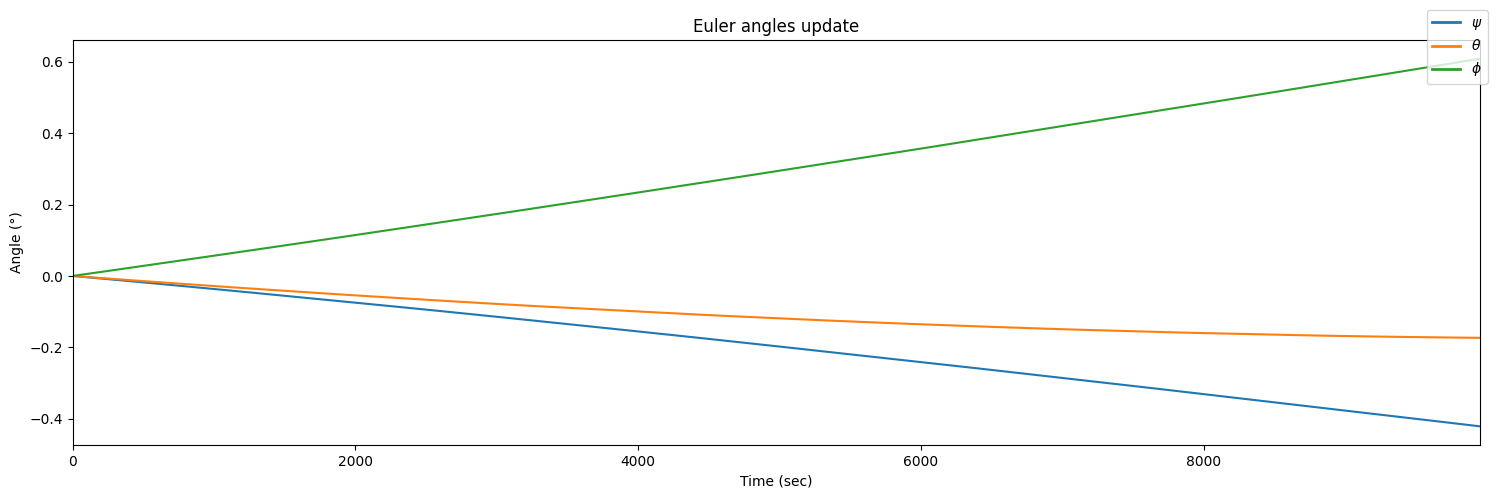

In [23]:
Visuals.plotData(
    data=imarData,
    x="time_acc",
    columns=["psi", "theta", "phi"],
    xlabel="Time (sec)",
    ylabel="Angle (°)",
    labels=["$\\psi$", "$\\theta$", "$\\phi$"],
    title="Euler angles update",
)

### SBG

In [24]:
results = np.zeros(shape=(len(sbgData), 9))  # angles, vel, pos
# Initialization
previous_time = 0.0
previous_angular_vel = np.zeros(3)
previous_rotation_matrix = np.eye(3)
previous_acceleration = np.zeros(3)
previous_velocity = np.zeros(3)
previous_position = np.zeros(3)

current_time = 0.0
current_angular_vel = np.zeros(3)
current_rotation_matrix = np.eye(3)
current_acceleration = np.zeros(3)
current_velocity = np.zeros(3)
current_position = np.zeros(3)


for index, row in enumerate(tqdm(sbgData.to_numpy()[:, 1:8])):
    # First iter
    if index < 1:
        previous_time = row[0]
        continue

    measured_specific_force = row[1:4]
    # print(f"{measured_specific_force=}")
    current_angular_vel = row[4:]
    # print(f"{current_angular_vel=}")

    # Delta
    current_time = row[0]
    delta_time = current_time - previous_time

    # Update attitude
    current_rotation_matrix = updateAttitude(
        previous_rotation_matrix,
        current_angular_vel,
        delta_time
    )
    # print(f"{current_rotation_matrix=}")

    # Specific force frame transformation
    measured_specific_force_transformed = specificForceFrameTransformation(
        current_rotation_matrix,
        previous_rotation_matrix,
        measured_specific_force 
    )
    # print(f"{measured_specific_force_transformed=}")

    # Obtain actual acceleration
    current_acceleration = obtainAcceleration(
        measured_specific_force_transformed,
        current_position,
    )
    # print(f"{current_acceleration=}")

    # Update velocity
    current_velocity = updateVelocity(
        previous_velocity,
        current_acceleration,
        delta_time
    )
    # print(f"{current_velocity=}")

    # Update position
    current_position = updatePosition(
        previous_position,
        current_velocity,
        current_acceleration,
        delta_time
    )
    # print(f"{current_position=}")

    # Saves
    results[index, :3] = Math.rotationMatrix2Euler(current_rotation_matrix)
    results[index, 3:6] = current_velocity
    results[index, 6:] = current_position

    # Updates variables
    previous_time = current_time
    previous_acceleration = current_acceleration
    previous_angular_vel = current_angular_vel
    previous_rotation_matrix = current_rotation_matrix
    previous_velocity = current_velocity
    previous_position = current_position

100%|██████████| 735399/735399 [00:23<00:00, 31509.14it/s]


In [25]:
columns = ['psi', 'theta', 'phi', 'velx', 'vely', 'velz', 'posx', 'posy','posz']
sbgData[columns] = results
sbgData

,time_acc,time_omg,accx,accy,accz,omgx,omgy,omgz,rate,psi,theta,phi,velx,vely,velz,posx,posy,posz
0,0.00,0.00,0.030871,-0.006173,-9.816584,-0.002265,-2.472685e-04,0.000109,100,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.01,0.01,0.031588,0.004174,-9.828276,-0.003887,-2.294241e-04,-0.000794,100,-0.000039,-0.000002,-0.000008,3.159922e-04,3.982831e-05,-9.828276e-02,1.579961e-06,1.991415e-07,-4.914138e-04
2,0.02,0.02,0.033491,-0.005692,-9.821117,-0.002777,-4.907124e-07,-0.000454,100,-0.000067,-0.000002,-0.000012,5.806950e+34,7.319200e+33,-9.030534e+36,2.903475e+32,3.659600e+31,-4.515267e+34
3,0.03,0.03,0.030782,-0.002433,-9.818702,-0.003760,-7.685852e-04,-0.000164,100,-0.000104,-0.000010,-0.000014,5.806950e+34,7.319200e+33,-9.030534e+36,8.710425e+32,1.097880e+32,-1.354580e+35
4,0.04,0.04,0.023012,-0.002295,-9.821590,-0.002627,-4.647539e-04,-0.000484,100,-0.000131,-0.000015,-0.000019,5.806950e+34,7.319200e+33,-9.030534e+36,1.451738e+33,1.829800e+32,-2.257633e+35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735394,7353.94,7353.94,0.032608,-0.014871,-9.820513,-0.002969,-2.163593e-05,-0.000144,100,2.669097,-0.047603,-0.079166,5.806950e+34,7.319200e+33,-9.030534e+36,4.270388e+38,5.382485e+37,-6.640987e+40
735395,7353.95,7353.95,0.023163,-0.000921,-9.815941,-0.002559,-2.056626e-04,-0.000384,100,2.669071,-0.047599,-0.079163,5.806950e+34,7.319200e+33,-9.030534e+36,4.270393e+38,5.382492e+37,-6.640996e+40
735396,7353.96,7353.96,0.031050,0.003212,-9.824295,-0.002658,-6.801591e-04,-0.000585,100,2.669044,-0.047590,-0.079161,5.806950e+34,7.319200e+33,-9.030534e+36,4.270399e+38,5.382500e+37,-6.641005e+40
735397,7353.97,7353.97,0.021856,-0.006854,-9.810421,-0.003436,1.942834e-04,-0.000252,100,2.669010,-0.047591,-0.079158,5.806950e+34,7.319200e+33,-9.030534e+36,4.270405e+38,5.382507e+37,-6.641014e+40


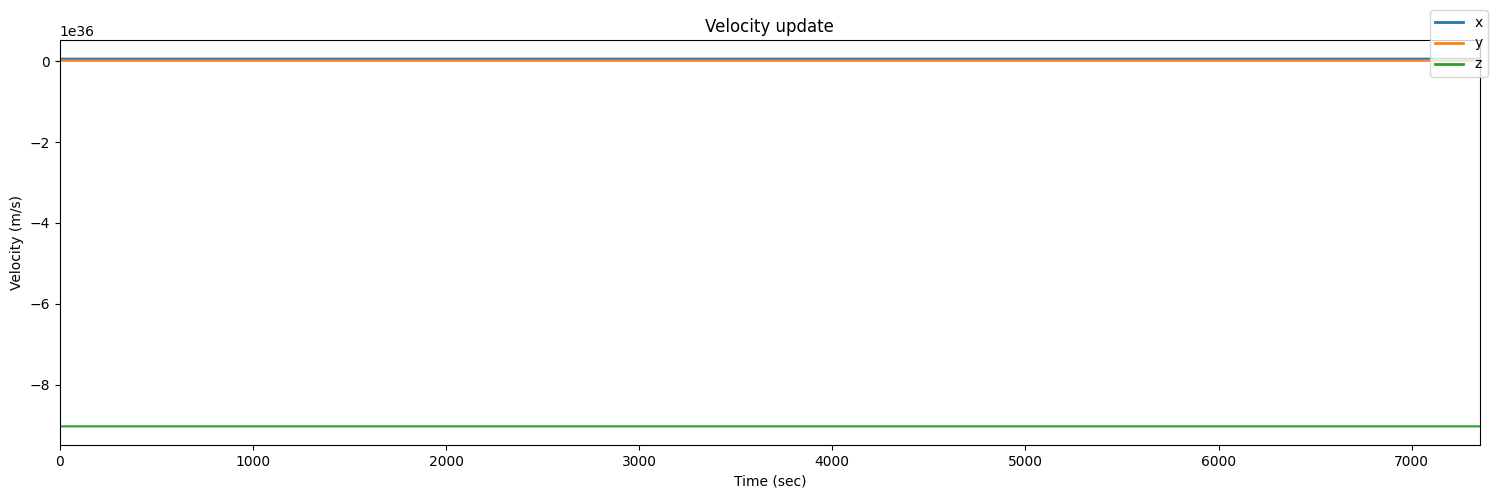

In [26]:
Visuals.plotData(
    data=sbgData,
    x="time_acc",
    columns=["velx", "vely", "velz"],
    xlabel="Time (sec)",
    ylabel="Velocity (m/s)",
    labels=["x", "y", "z"],
    title="Velocity update",
)

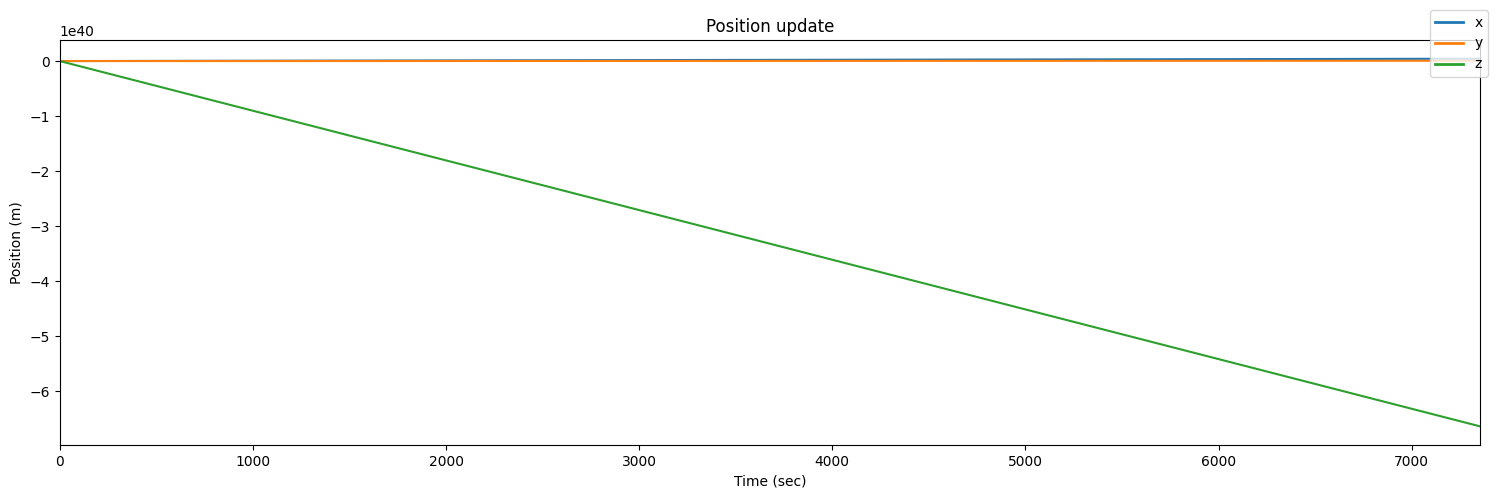

In [27]:
Visuals.plotData(
    data=sbgData,
    x="time_acc",
    columns=["posx", "posy", "posz"],
    xlabel="Time (sec)",
    ylabel="Position (m)",
    labels=["x", "y", "z"],
    title="Position update",
)

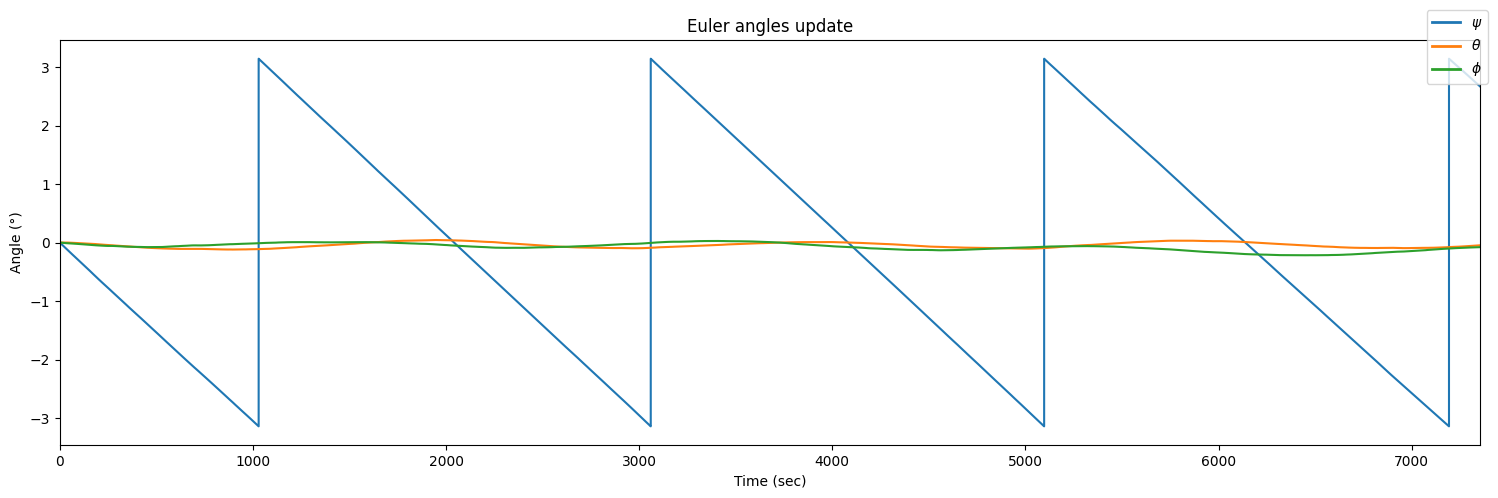

In [28]:
Visuals.plotData(
    data=sbgData,
    x="time_acc",
    columns=["psi", "theta", "phi"],
    xlabel="Time (sec)",
    ylabel="Angle (°)",
    labels=["$\\psi$", "$\\theta$", "$\\phi$"],
    title="Euler angles update",
)

In [30]:
a = np.random.random(10) * 10
a

array([5.24111518, 5.45273579, 2.13835744, 1.96235254, 0.23098572,
       9.11093149, 5.31428026, 0.48028078, 0.69147796, 4.73767532])

In [31]:
type(a[0])

numpy.float64

In [36]:
a_i = a.astype(np.uint8)
a_i

array([5, 5, 2, 1, 0, 9, 5, 0, 0, 4], dtype=uint8)

In [37]:
type(a_i[0])

numpy.uint8